In [1]:
from db_utils import DataFrameInfo, DataTransform, DataFrameTransform, Plotter
import pandas as pd
from pandas.api.types import is_numeric_dtype

data = pd.read_csv('loan_payments.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [2]:
info = DataFrameInfo
transform = DataTransform
df_transform = DataFrameTransform
plot = Plotter

In [3]:
info(data).count_nulls()

id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq         31002
mths_since_last_record         48050
open_accounts                      0
total_accounts                     0
out_prncp                          0
o

<AxesSubplot:>

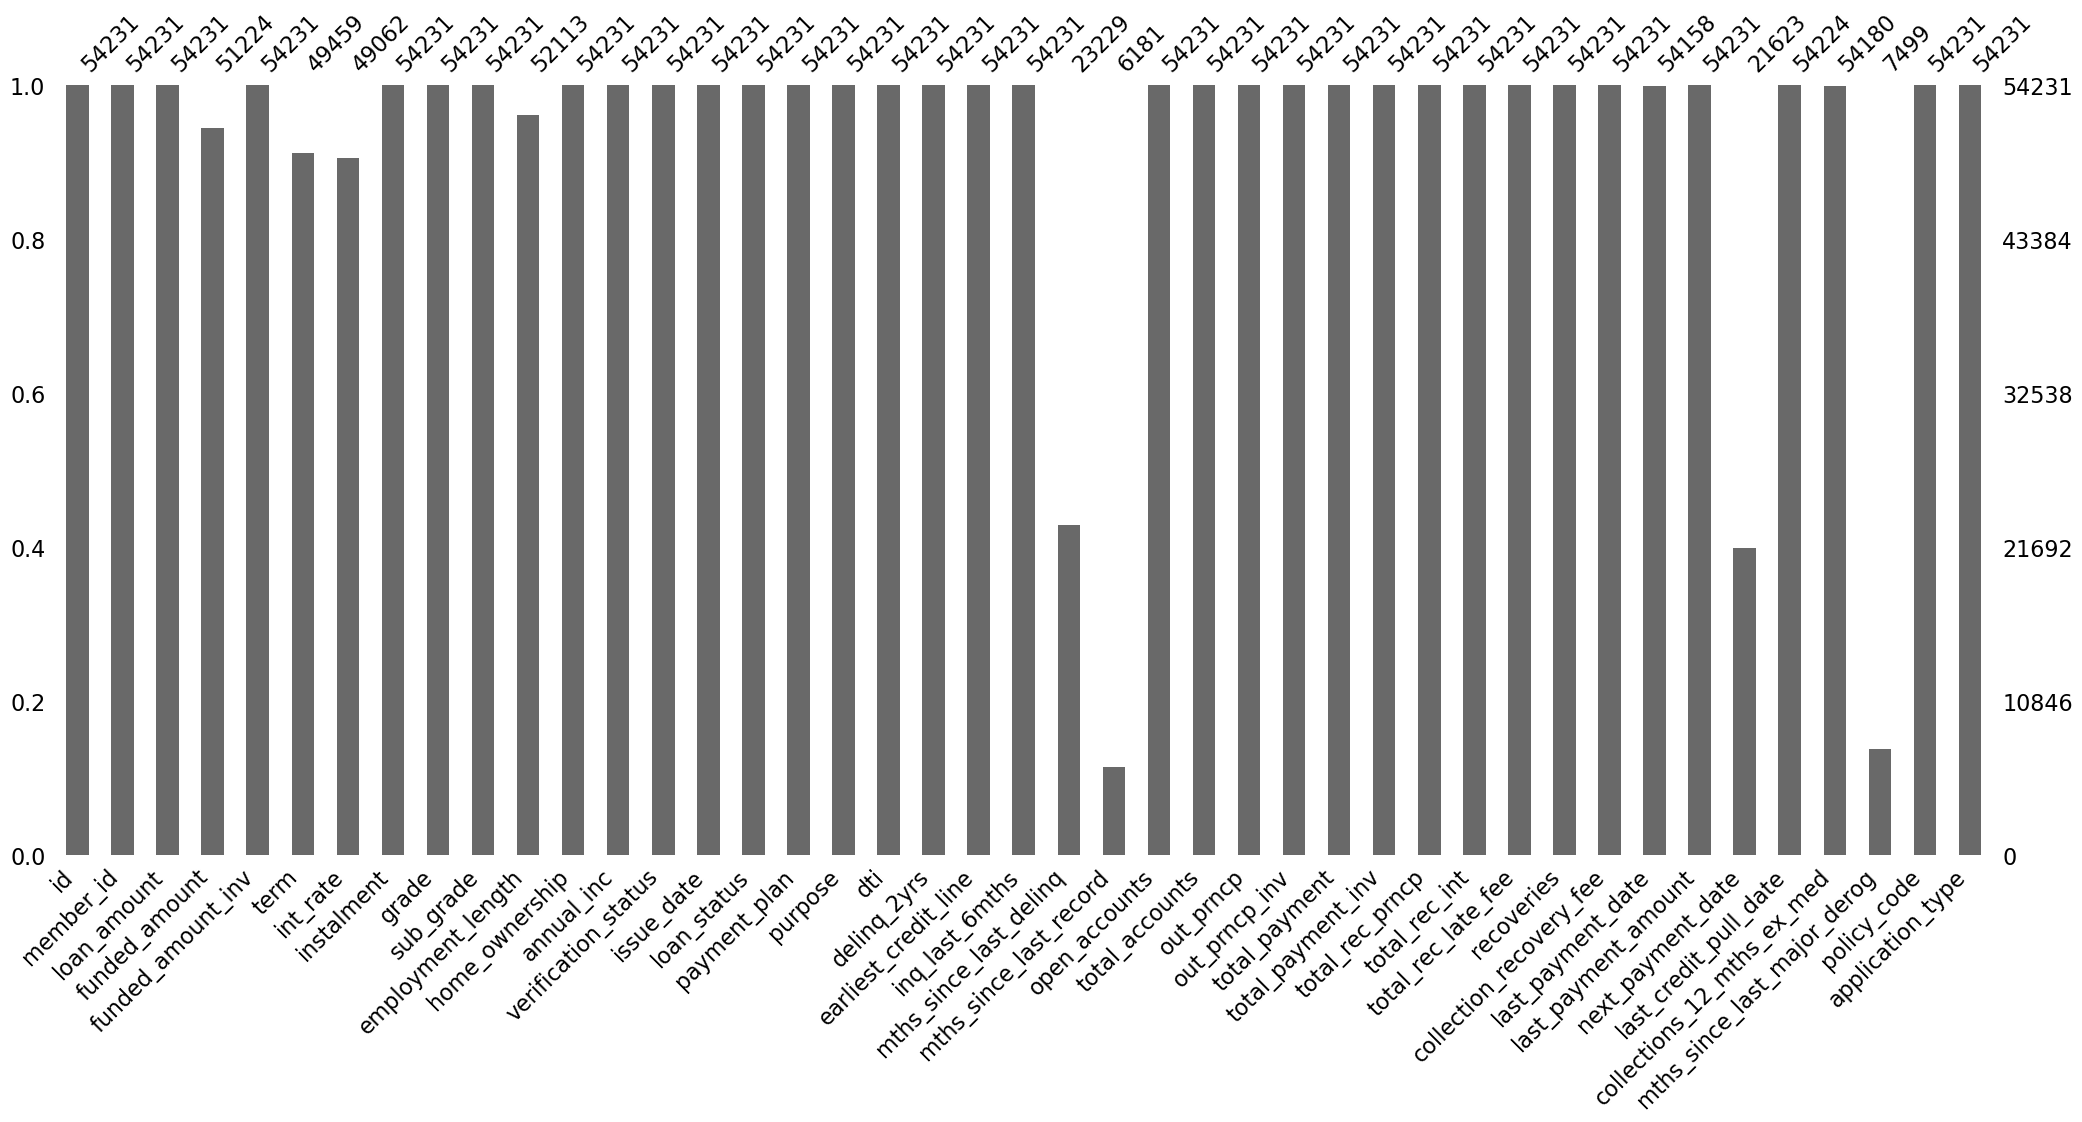

In [4]:
plot(data).visualise_NaN()

In [5]:
new_data = data
for col in data.columns:
    if info(data).check_nulls(col) == True:
        if is_numeric_dtype(data[col]):
            df_transform(new_data).impute_mean(col)
        else:
            print(col)
info(new_data).count_nulls()

term
employment_length
last_payment_date
next_payment_date
last_credit_pull_date


id                                 0
member_id                          0
loan_amount                        0
funded_amount                      0
funded_amount_inv                  0
term                            4772
int_rate                           0
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq             0
mths_since_last_record             0
open_accounts                      0
total_accounts                     0
out_prncp                          0
o

<AxesSubplot:xlabel='funded_amount', ylabel='Count'>

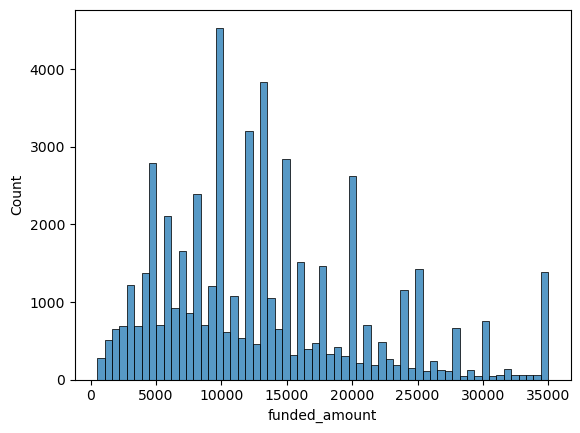

In [6]:
transform(data).convert_to_float('funded_amount')
plot(data).histogram('funded_amount')

In [7]:
info(new_data).measure_skew()

id                              2.370336
member_id                       2.205422
loan_amount                     0.805259
funded_amount                   0.845563
funded_amount_inv               0.813927
int_rate                        0.433193
instalment                      0.996981
annual_inc                      8.711831
dti                             0.189420
delinq_2yrs                     5.370002
inq_last_6mths                  3.248918
mths_since_last_delinq          0.669383
mths_since_last_record         -2.487585
open_accounts                   1.059282
total_accounts                  0.779014
out_prncp                       2.356426
out_prncp_inv                   2.356848
total_payment                   1.267891
total_payment_inv               1.256197
total_rec_prncp                 1.261015
total_rec_int                   2.204322
total_rec_late_fee             13.184305
recoveries                     14.589793
collection_recovery_fee        27.636843
last_payment_amo

(27.63684310809756, <AxesSubplot:ylabel='Density'>)

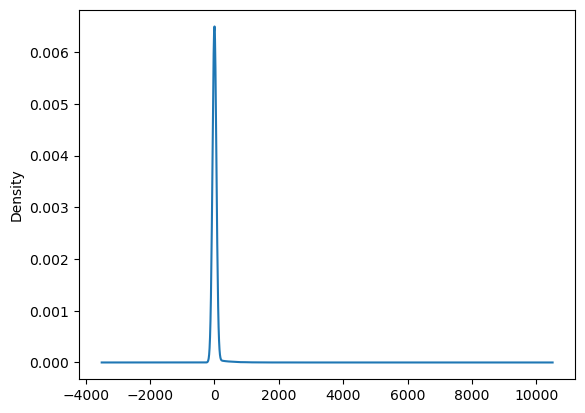

In [8]:
plot(new_data).visualise_skew('collection_recovery_fee')

In [9]:
info(new_data).count_nulls_in_columns('collection_recovery_fee')

0

In [10]:
df_transform(new_data).log_transform('collection_recovery_fee')


0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
54226    0.000000
54227    0.000000
54228    0.000000
54229    0.000000
54230    0.609766
Name: collection_recovery_fee, Length: 54231, dtype: float64

In [11]:
info(new_data).count_nulls_in_columns('collection_recovery_fee')


0

(5.387292811029449, <AxesSubplot:ylabel='Density'>)

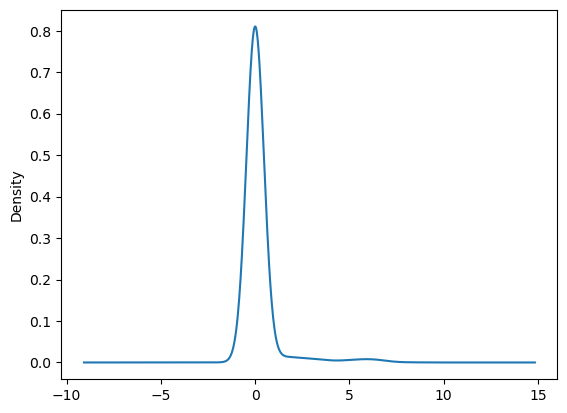

In [12]:
plot(new_data).visualise_skew('collection_recovery_fee')


In [13]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                54231 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     54231 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [14]:
df_transform(new_data).yeo_johnson_transform('total_rec_late_fee')
df_transform(new_data).yeo_johnson_transform('recoveries')
df_transform(new_data).yeo_johnson_transform('collections_12_mths_ex_med')

info(new_data).measure_skew()

id                              2.370336
member_id                       2.205422
loan_amount                     0.805259
funded_amount                   0.845563
funded_amount_inv               0.813927
int_rate                        0.433193
instalment                      0.996981
annual_inc                      8.711831
dti                             0.189420
delinq_2yrs                     5.370002
inq_last_6mths                  3.248918
mths_since_last_delinq          0.669383
mths_since_last_record         -2.487585
open_accounts                   1.059282
total_accounts                  0.779014
out_prncp                       2.356426
out_prncp_inv                   2.356848
total_payment                   1.267891
total_payment_inv               1.256197
total_rec_prncp                 1.261015
total_rec_int                   2.204322
total_rec_late_fee             13.184305
recoveries                     14.589793
collection_recovery_fee         5.387293
last_payment_amo

In [15]:
# for col in new_data.columns:
#     if is_numeric_dtype(new_data[col]):
#         print(info(new_data).outliers_in_columns(col))


7        26500
27       24575
33       25000
38       25000
49       26125
         ...  
54097    25000
54107    25000
54139    25000
54148    25000
54184    25000
Name: loan_amount, Length: 6072, dtype: int64

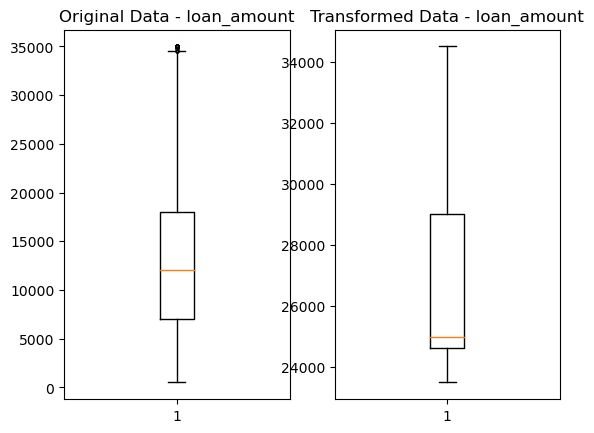

In [16]:
plot(new_data).visualise_outliers('loan_amount')
df_transform(new_data).remove_outliers('loan_amount')

c:\Users\tayyi\exploratory-data-analysis---customer-loans-in-finance879\db_utils.py:181: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(nrows=1, ncols=2)


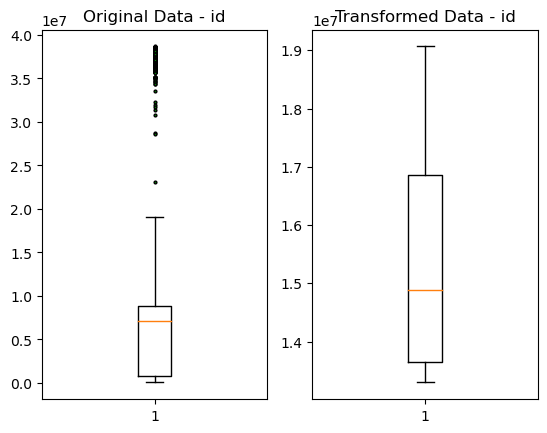

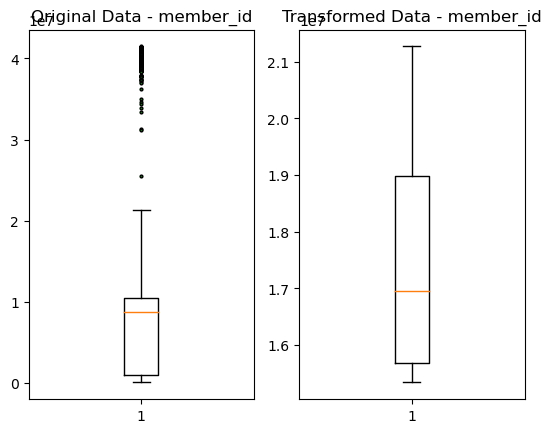

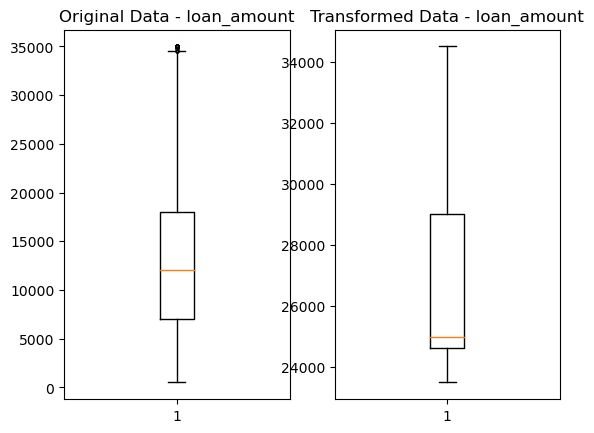

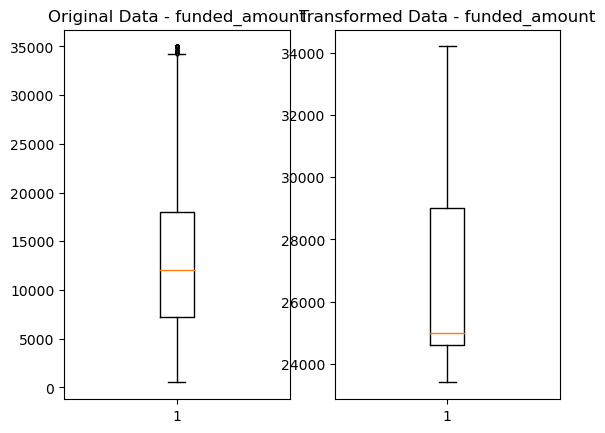

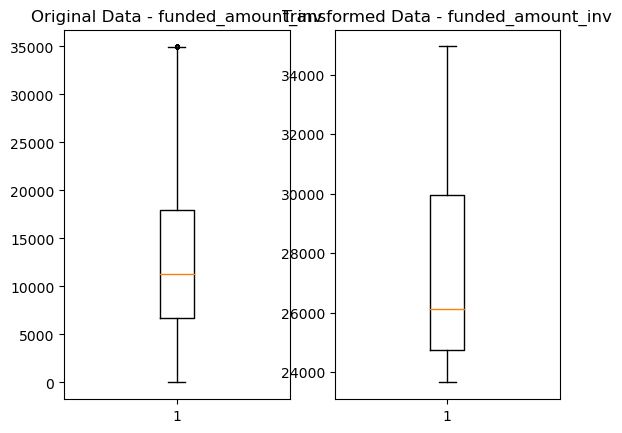

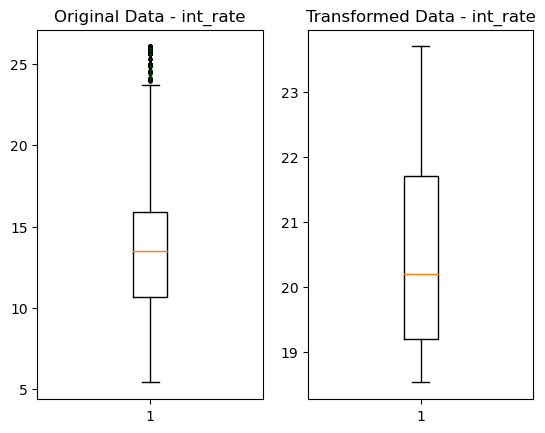

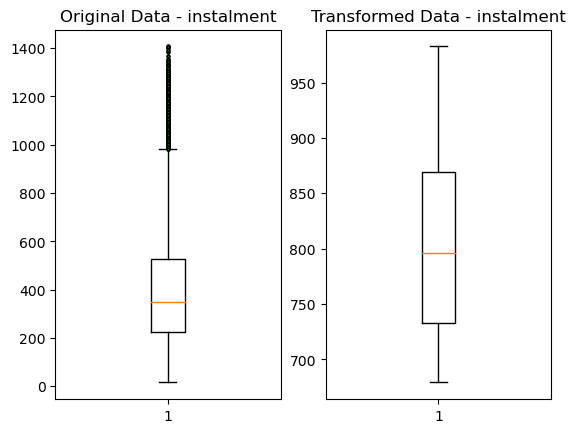

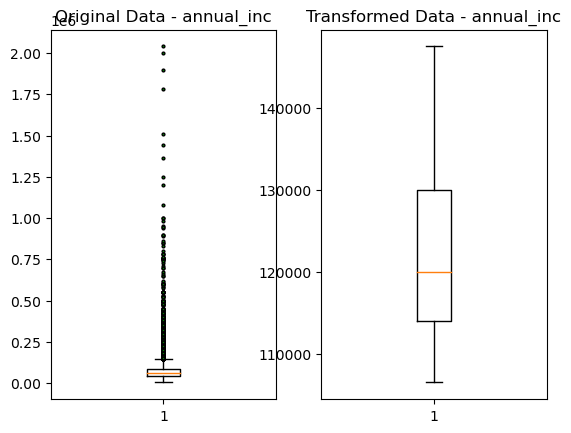

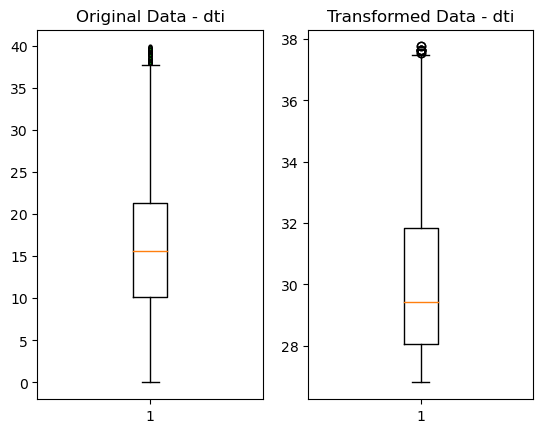

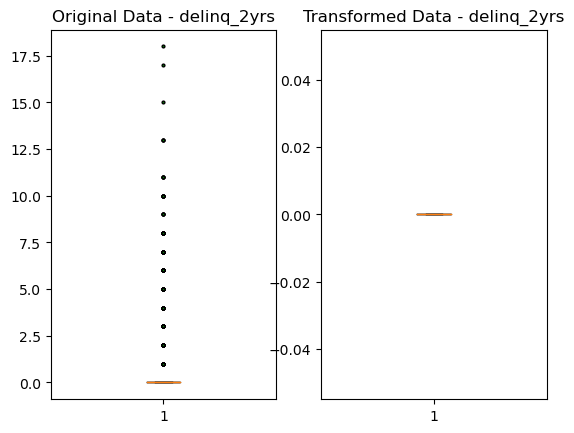

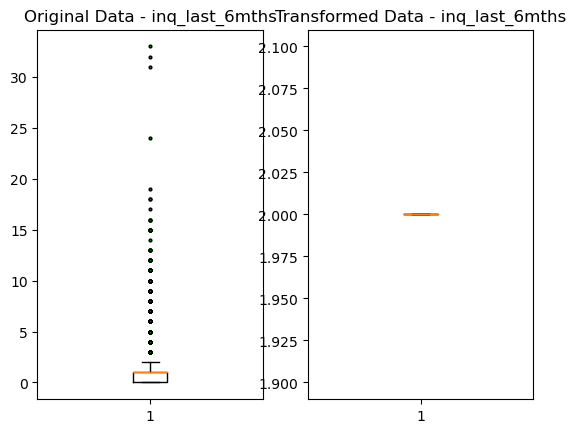

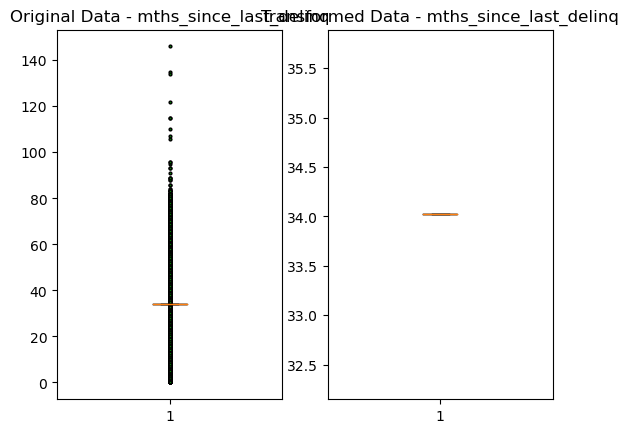

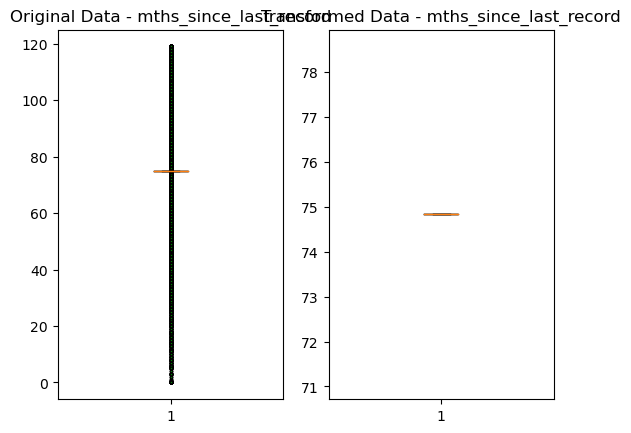

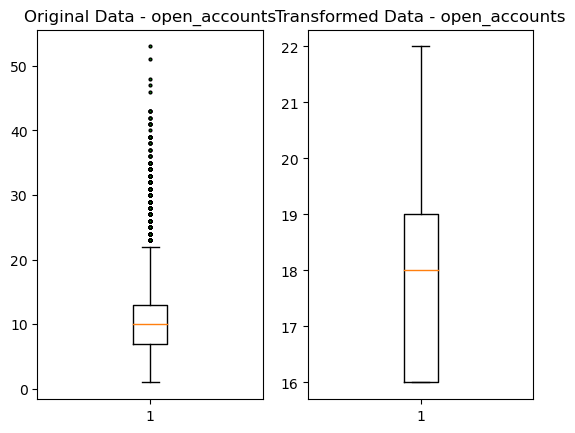

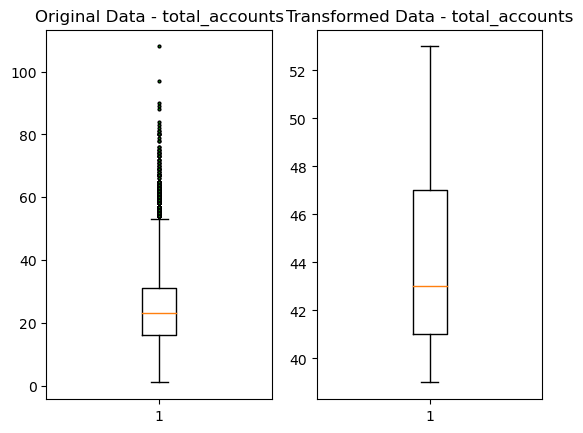

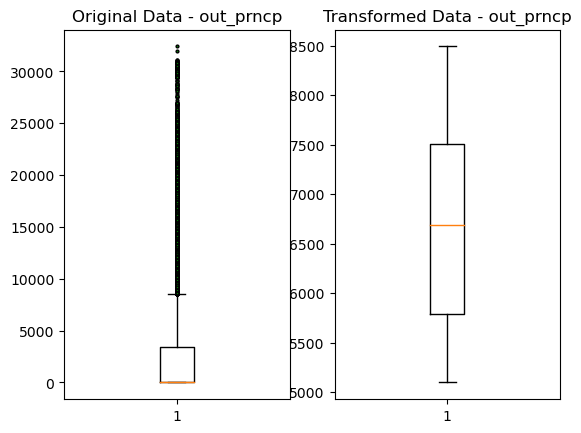

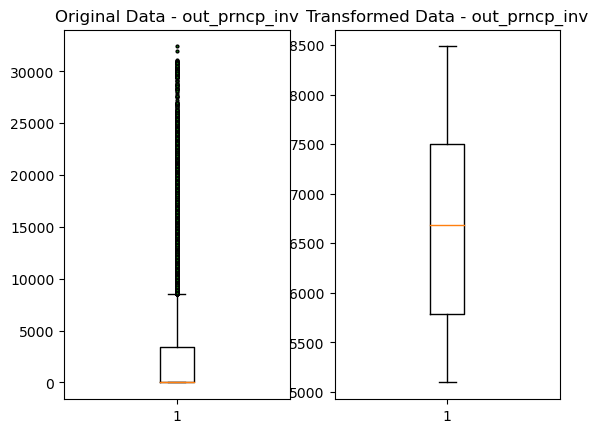

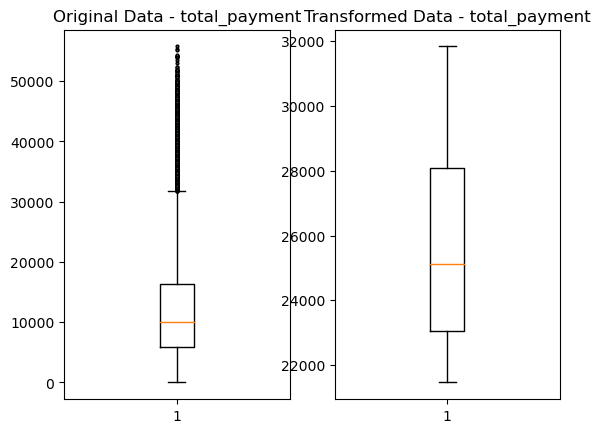

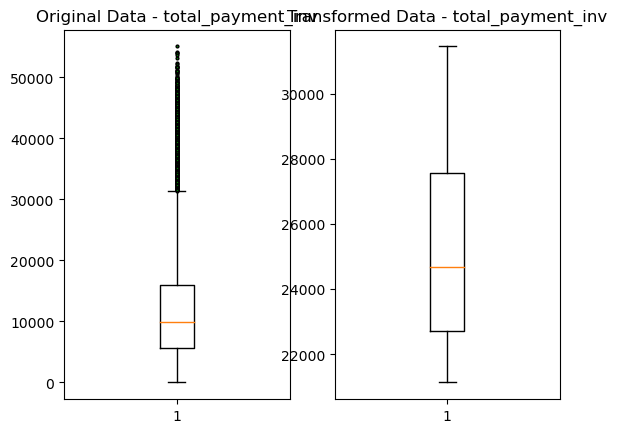

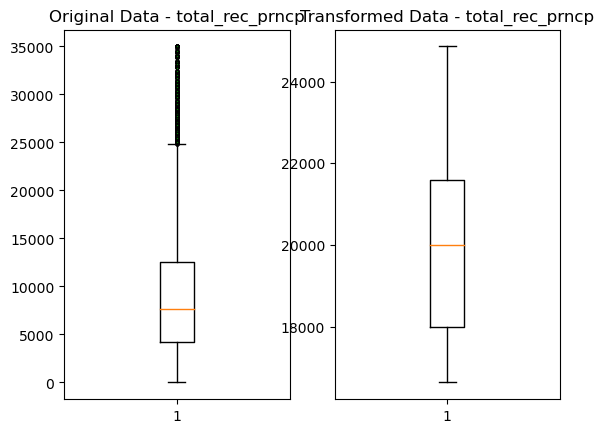

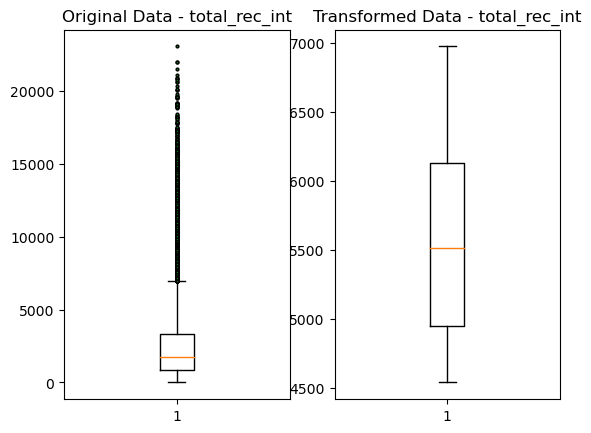

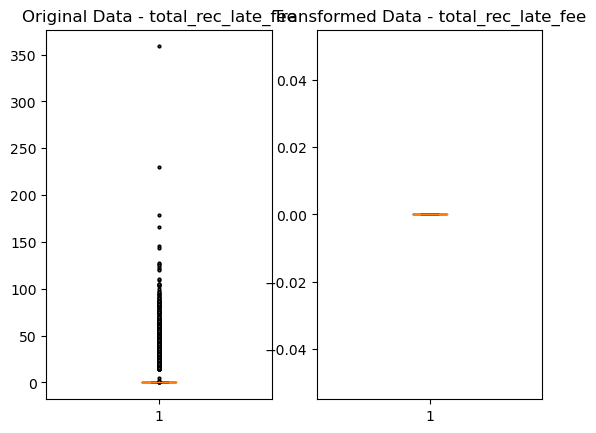

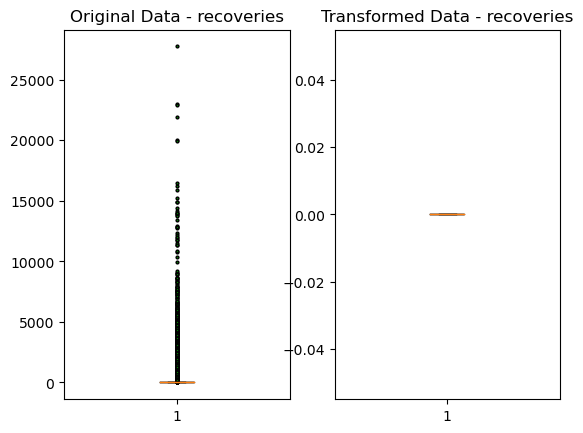

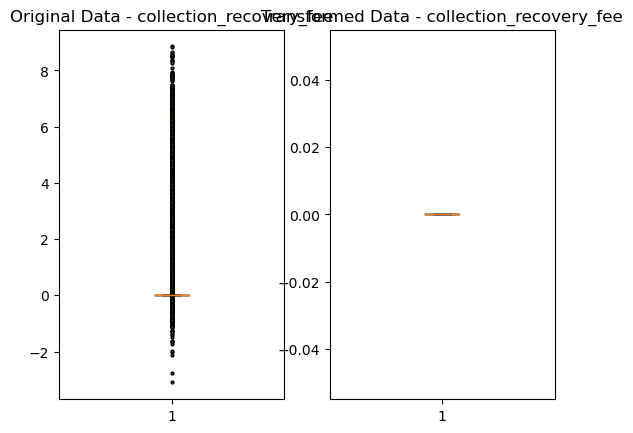

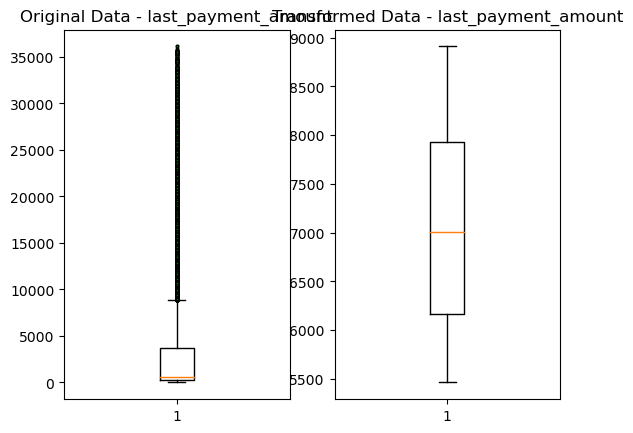

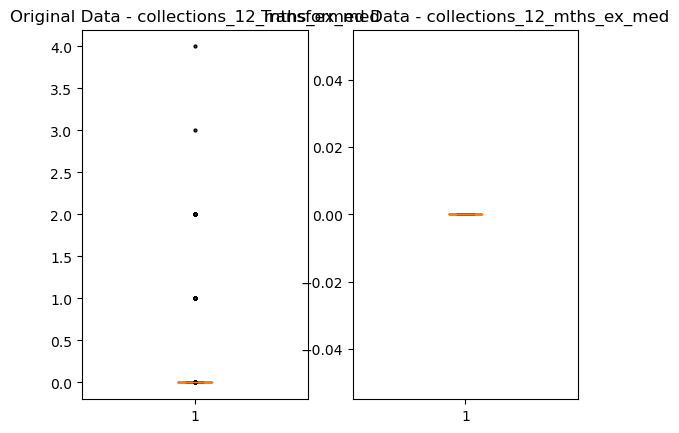

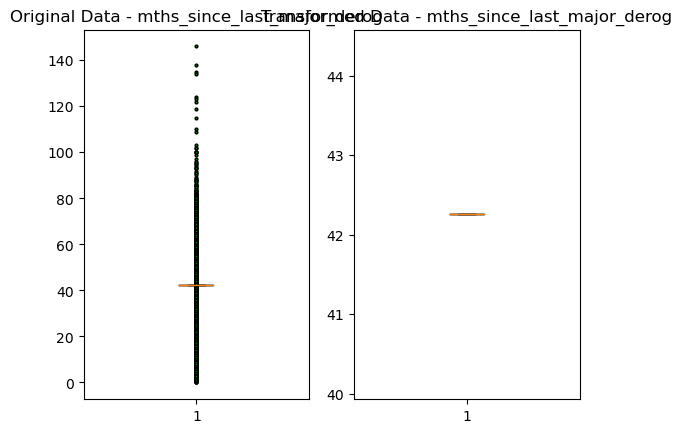

In [17]:
for col in new_data.columns:
    if is_numeric_dtype(new_data[col]):
        if (info(new_data).outliers_in_columns(col)).size > 0:
            plot(new_data).visualise_outliers(col)
            df_transform(new_data).remove_outliers(col)

In [18]:
plot(data).visualise_correlation_matrix()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,delinq_2yrs,...,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
id,1.000000,0.994194,0.133721,0.140502,0.168081,0.056333,0.137922,0.042435,0.200950,0.063277,...,-0.130137,-0.164642,-0.054807,-0.050619,-0.027131,-0.049030,-0.019755,0.074213,0.008302,NaN
member_id,0.994194,1.000000,0.139449,0.146572,0.175582,0.060814,0.144176,0.042157,0.203388,0.063588,...,-0.123159,-0.160132,-0.048856,-0.052497,-0.027103,-0.049340,-0.015981,0.072447,0.007700,NaN
loan_amount,0.133721,0.139449,1.000000,0.965484,0.975248,0.203633,0.947109,0.369098,0.093865,0.014964,...,0.796104,0.690440,0.722609,0.031843,0.115411,0.070504,0.347710,0.001290,-0.030162,NaN
funded_amount,0.140502,0.146572,0.965484,1.000000,0.954119,0.200656,0.927508,0.355610,0.095243,0.017074,...,0.773954,0.669181,0.704575,0.029974,0.110801,0.066149,0.336600,0.003375,-0.030434,NaN
funded_amount_inv,0.168081,0.175582,0.975248,0.954119,1.000000,0.210436,0.935176,0.355221,0.110524,0.017829,...,0.811478,0.670666,0.715332,0.016511,0.107254,0.061507,0.345458,0.003998,-0.030044,NaN
int_rate,0.056333,0.060814,0.203633,0.200656,0.210436,1.000000,0.191423,0.003088,0.172249,0.107497,...,0.162621,0.003235,0.472837,0.047563,0.110097,0.122308,0.100325,0.032569,-0.002820,NaN
instalment,0.137922,0.144176,0.947109,0.927508,0.935176,0.191423,1.000000,0.370811,0.092766,0.028720,...,0.789048,0.715248,0.640433,0.039302,0.107479,0.064287,0.331314,0.004962,-0.029430,NaN
annual_inc,0.042435,0.042157,0.369098,0.355610,0.355221,0.003088,0.370811,1.000000,-0.162667,0.055125,...,0.316971,0.304140,0.227689,0.013349,0.025027,-0.004185,0.155303,0.006142,-0.028423,NaN
dti,0.200950,0.203388,0.093865,0.095243,0.110524,0.172249,0.092766,-0.162667,1.000000,0.006949,...,0.019277,-0.034343,0.108614,-0.020738,0.015797,0.016901,-0.012101,0.012146,0.010512,NaN
delinq_2yrs,0.063277,0.063588,0.014964,0.017074,0.017829,0.107497,0.028720,0.055125,0.006949,1.000000,...,-0.003034,-0.021694,0.043543,0.023638,0.009783,0.007599,-0.003006,0.026084,-0.297847,NaN


In [19]:
plot(df_transform(new_data).remove_correlated_columns()).visualise_correlation_matrix()

,id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
id,1.000000,0.133721,0.140502,0.168081,0.056333,0.137922,0.042435,0.200950,0.063277,-0.093655,...,-0.130137,-0.164642,-0.054807,-0.050619,-0.027131,-0.049030,-0.019755,0.074213,0.008302,NaN
loan_amount,0.133721,1.000000,0.965484,0.975248,0.203633,0.947109,0.369098,0.093865,0.014964,-0.037443,...,0.796104,0.690440,0.722609,0.031843,0.115411,0.070504,0.347710,0.001290,-0.030162,NaN
funded_amount,0.140502,0.965484,1.000000,0.954119,0.200656,0.927508,0.355610,0.095243,0.017074,-0.036999,...,0.773954,0.669181,0.704575,0.029974,0.110801,0.066149,0.336600,0.003375,-0.030434,NaN
funded_amount_inv,0.168081,0.975248,0.954119,1.000000,0.210436,0.935176,0.355221,0.110524,0.017829,-0.062726,...,0.811478,0.670666,0.715332,0.016511,0.107254,0.061507,0.345458,0.003998,-0.030044,NaN
int_rate,0.056333,0.203633,0.200656,0.210436,1.000000,0.191423,0.003088,0.172249,0.107497,0.163217,...,0.162621,0.003235,0.472837,0.047563,0.110097,0.122308,0.100325,0.032569,-0.002820,NaN
instalment,0.137922,0.947109,0.927508,0.935176,0.191423,1.000000,0.370811,0.092766,0.028720,-0.017155,...,0.789048,0.715248,0.640433,0.039302,0.107479,0.064287,0.331314,0.004962,-0.029430,NaN
annual_inc,0.042435,0.369098,0.355610,0.355221,0.003088,0.370811,1.000000,-0.162667,0.055125,0.048228,...,0.316971,0.304140,0.227689,0.013349,0.025027,-0.004185,0.155303,0.006142,-0.028423,NaN
dti,0.200950,0.093865,0.095243,0.110524,0.172249,0.092766,-0.162667,1.000000,0.006949,-0.019287,...,0.019277,-0.034343,0.108614,-0.020738,0.015797,0.016901,-0.012101,0.012146,0.010512,NaN
delinq_2yrs,0.063277,0.014964,0.017074,0.017829,0.107497,0.028720,0.055125,0.006949,1.000000,0.010199,...,-0.003034,-0.021694,0.043543,0.023638,0.009783,0.007599,-0.003006,0.026084,-0.297847,NaN
inq_last_6mths,-0.093655,-0.037443,-0.036999,-0.062726,0.163217,-0.017155,0.048228,-0.019287,0.010199,1.000000,...,-0.028496,-0.019008,0.015278,0.053798,0.043110,0.050918,0.020308,-0.006497,-0.000266,NaN


In [20]:
new_df = df_transform(new_data).remove_correlated_columns()

In [21]:
new_df.to_csv('transformed_loan_payments')